<a href="https://colab.research.google.com/github/ys2064/Timeseries_Food-Demand-Forecasting/blob/main/TCN%20modeling/TCN_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
file_path = '/content/drive/My Drive/timeseries dataset/TCN dataset.csv'
data = pd.read_csv(file_path)

train_set = data[data['week'] <= 100]
val_set = data[(data['week'] > 100) & (data['week'] <= 120)]
test_set = data[data['week'] > 120]
train_set.to_csv('/content/drive/My Drive/TCN/train_set.csv', index=False)
val_set.to_csv('/content/drive/My Drive/TCN/val_set.csv', index=False)
test_set.to_csv('/content/drive/My Drive/TCN/test_set.csv', index=False)
train_weeks = train_set['week'].unique()
val_weeks = val_set['week'].unique()
test_weeks = test_set['week'].unique()
print(f'Train set: Weeks {train_weeks.min()} to {train_weeks.max()} (Total: {len(train_weeks)})')
print(f'Validation set: Weeks {val_weeks.min()} to {val_weeks.max()} (Total: {len(val_weeks)})')
print(f'Test set: Weeks {test_weeks.min()} to {test_weeks.max()} (Total: {len(test_weeks)})')
print(f'Train set shape: {train_set.shape}')
print(f'Validation set shape: {val_set.shape}')
print(f'Test set shape: {test_set.shape}')

Train set: Weeks 1 to 100 (Total: 100)
Validation set: Weeks 101 to 120 (Total: 20)
Test set: Weeks 121 to 145 (Total: 25)
Train set shape: (306110, 35)
Validation set shape: (64195, 35)
Test set shape: (81005, 35)


In [4]:
!pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
train_set = pd.read_csv('/content/drive/My Drive/TCN/train_set.csv')
val_set = pd.read_csv('/content/drive/My Drive/TCN/val_set.csv')

features = [
    'week',
    'center_id',
    'meal_id',
    'base_price',
    'emailer_for_promotion',
    'homepage_featured',
    'city_code',
    'region_code',
    'op_area',
    'interaction_feature',
    'rolling_mean_orders',
    'rolling_std_orders',
    'category_Biryani',
    'category_Desert',
    'category_Extras',
    'category_Fish',
    'category_Other Snacks',
    'category_Pasta',
    'category_Pizza',
    'category_Rice Bowl',
    'category_Salad',
    'category_Sandwich',
    'category_Seafood',
    'category_Soup',
    'category_Starters',
    'cuisine_Indian',
    'cuisine_Italian',
    'cuisine_Thai',
    'center_type_TYPE_B',
    'center_type_TYPE_C'
]
lag_features = [
    'num_orders_lag_1',
    'num_orders_lag_2',
    'num_orders_lag_3'
]
target = 'num_orders_winsorized'
all_features = features + lag_features

scaler = MinMaxScaler()
train_set[all_features] = scaler.fit_transform(train_set[all_features])
val_set[all_features] = scaler.transform(val_set[all_features])
def create_sequences(data, target_col, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length][all_features].values
        target = data.iloc[i + seq_length][target_col]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)
seq_length = 3
X_train, y_train = create_sequences(train_set, target, seq_length)
X_val, y_val = create_sequences(val_set, target, seq_length)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}, y_val shape: {y_val.shape}')


X_train shape: (306107, 3, 33), y_train shape: (306107,)
X_val shape: (64192, 3, 33), y_val shape: (64192,)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3, 33)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 3, 128)              │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 3, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,633 (147.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1 - Train Loss: 137.7300, Val Loss: 128.8264
Epoch 2 - Train Loss: 127.6889, Val Loss: 126.0004
Epoch 3 - Train Loss: 124.2066, Val Loss: 122.3025
Epoch 4 - Train Loss: 121.9870, Val Loss: 121.8749
Epoch 5 - Train Loss: 120.3878, Val Loss: 120.2625
Epoch 6 - Train Loss: 119.1637, Val Loss: 120.1359
Epoch 7 - Train Loss: 118.1171, Val Loss: 118.7402
Epoch 8 - Train Loss: 117.3101, Val Loss: 118.6424
Epoch 9 - Train Loss: 116.5366, Val Loss: 117.8012
Epoch 10 - Train Loss: 115.8133, Val Loss: 118.6459
Epoch 11 - Train Loss: 115.2500, Val Loss: 117.2954
Epoch 12 - Train Loss: 114.5786, Val Loss: 116.3077
Epoch 13 - Train Loss: 114.2004, Val Loss: 116.8497
Epoch 14 - Train Loss: 113.7997, Val Loss: 116.0440
Epoch 15 - Train Loss: 113.3477, Val Loss: 116.7853
Epoch 16 - Train Loss: 112.9722, Val Loss: 115.5305
Epoch 17 - Train Loss: 112.6329, Val Loss: 116.3816
Epoch 18 - Train Loss: 112.2474, Val Loss: 115.7865
Epoch 19 - Train Loss: 111.8896, Val Loss: 115.2011
Epoch 20 - Train Loss

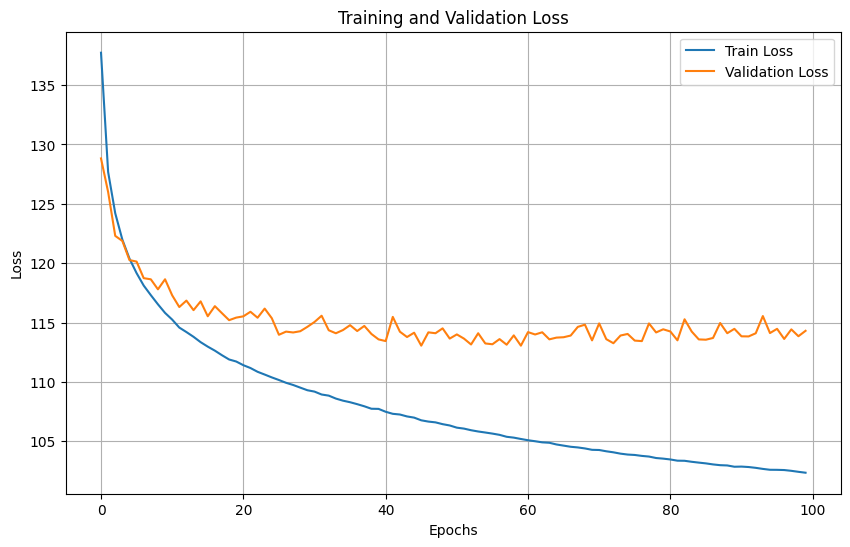

In [8]:
def create_tcn_model(input_shape, filters1, filters2, kernel_size=3, dilation_rate=2):
    with tf.device('/GPU:0'):
        inputs = layers.Input(shape=input_shape)
        x = layers.Conv1D(filters=filters1, kernel_size=kernel_size, activation='relu', padding='causal', dilation_rate=dilation_rate)(inputs)
        x = layers.Conv1D(filters=filters2, kernel_size=kernel_size, activation='relu', padding='causal', dilation_rate=dilation_rate)(x)
        x = layers.Flatten()(x)
        outputs = layers.Dense(1)(x)
        model = tf.keras.Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')
        return model
model = create_tcn_model((X_train.shape[1], X_train.shape[2]), filters1=128, filters2=64)
model.summary()

train_losses, val_losses = [], []
for epoch in range(100):
    with tf.device('/GPU:0'):
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, verbose=0, epochs=1)
        train_loss = history.history['loss'][0]
        val_loss = history.history['val_loss'][0]
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch + 1} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

print(f"\nFinal Train Loss: {train_losses[-1]:.4f}")
print(f"Final Val Loss: {val_losses[-1]:.4f}")
y_pred = model.predict(X_val)
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()
model.save('/content/drive/My Drive/TCN/TCN_final_model.h5')
